In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats
from scipy import misc

## Definition ##

Measuring the rough size of the squared deviations has the advantage that it avoids cancellation between positive and negative errors. The disadvantage is that squared deviations have units that are difficult to understand. The measure of spread that we are about to define takes care of this problem.

### Root Mean Squared Deviation from the Mean ###
Let $X$ be a random variable with expectation $\mu_X$. The *standard deviation* of $X$, denoted $SD(X)$ or $\sigma_X$, is the root mean square of deviations from the mean:

$$
SD(X) = \sigma_X = \sqrt{ E\big{(} (X-\mu_X)^2 \big{)} }
$$

$SD(X)$ has the same units as $X$ and $E(X)$. In this chapter we will make precise the sense in which the standard deviation measures the spread of the distribution of $X$ about the center $\mu_X$.

The quantity inside the square root is called the *variance* of $X$ and has better computational properties than the SD. This turns out to be closely connected to the fact that by Pythagoras' Theorem, squares of distances combine in useful ways.

$$
Var(X) = \sigma_X^2 = E\big{(} (X-\mu_X)^2 \big{)}
$$

Almost invariably, we will calculate standard deviations by first finding the variance and then taking the square root.

Let's try out the definition of the SD on a random variable $X$ that has the distribution defined below.

In [2]:
x = make_array(3, 4, 5)
probs = make_array(0.2, 0.5, 0.3)
dist_X = Table().values(x).probability(probs)
dist_X

Value,Probability
3,0.2
4,0.5
5,0.3


In [3]:
dist_X.ev()

4.1

Here are the squared deviations from the expectation $E(X) = 4.1$.

In [4]:
sd_table = Table().with_columns(
    'x', dist_X.column(0),
    '(x - 4.1)**2', (dist_X.column(0)-4.1)**2,
    'P(X = x)', dist_X.column(1)
)
sd_table

x,(x - 4.1)**2,P(X = x)
3,1.21,0.2
4,0.01,0.5
5,0.81,0.3


The standard deviation of $X$ is the square root of the mean squared deviation. The calculation below shows that its numerical value is $SD(X) = 0.7$.

In [5]:
sd_X = np.sqrt(sum(sd_table.column(1)*sd_table.column(2)))
sd_X

0.7

The `prob140` method `sd` applied to a distribution object returns the standard deviation, saving you the calculation above.

In [6]:
dist_X.sd()

0.7

We now know how to calculate the SD. But we don't yet have a good understanding of what it does. Let's start developing a few properties that it ought to have. Then we can check if it has them.

First, the SD of a constant should be 0. You should check that this is indeed what the definition implies.

### Shifting and Scaling ###
The SD is a measure of spread. It's natural to want measures of spread to remain unchanged if we just shift a probability histogram to the left or right. Such a shift occurs when we add a constant to a random variable. The figure below shows the distribution of the same $X$ as above, along with the distribution of $X+5$. It is clear that $X+5$ should have the same SD as $X$.

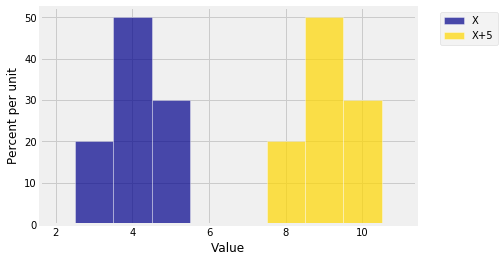

In [7]:
dist2 = Table().values(x+5).probability(probs)
Plots('X', dist_X, 'X+5', dist2)

On the other hand, multiplying $X$ by a constant results in a distribution that should have a different spread. Here is the distribution of $X$ along with the distribution of $4X$. The spread of the distribution of $4X$ appears to be four times as large as that of $X$. 

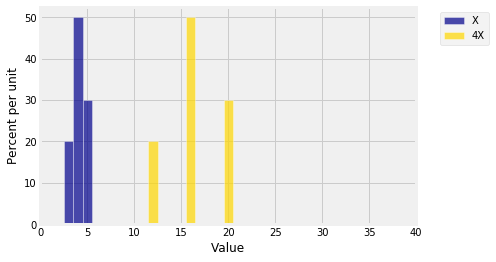

In [8]:
dist3 = Table().values(4*x).probability(probs)
Plots('X', dist_X, '4X', dist3 )
plt.xlim(0, 40);

Multiplying by $-4$ should have the same effect on the spread as multiplying by 4, as the figure below shows. One histogram is just the mirror image of the other about the vertical axis at 0. There is no change in spread.

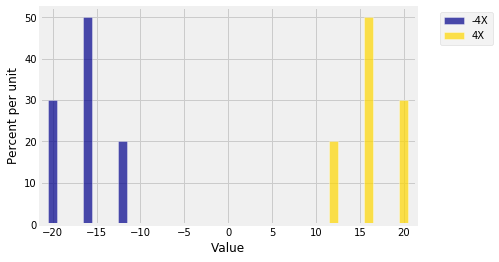

In [9]:
dist4 = Table().values(-4*x).probability(probs)
Plots('-4X', dist4, '4X', dist3 )

The graphs above help us visualize what happens to the SD when the random variable is transformed linearly. Let $Y = aX + b$. Then

\begin{align*}
Var(Y) = E\big{[} (Y-\mu_Y)^2 \big{]} &= E\big{[} (aX + b - a\mu_X - b)^2 \big{]}\\ 
&= a^2 E \big{[} (X - \mu_X)^2 \big{]}\\ 
&= a^2 \sigma_X^2
\end{align*}

Notice that the shift $b$ has no effect on the variance. This is consistent with what we saw in the first visualization above.

Because the units of the variance are the square of the units of $X$, $Var(Y)$ is $a^2$ times the variance of $X$. Thus $SD(Y)$ is

$$
SD(aX + b) = |a|\sigma_X
$$

Notice that you get the same answer when the multiplicative constant is $a$ as when it is $-a$. That is what the two "mirror image" histograms had shown.

In particular, it is very handy to remember that $SD(X) = SD(-X)$.

### "Computational" Formula for Variance ###
An algebraic simplification of the formula for variance turns out to be very useful.

\begin{align*}
\sigma_X^2 &= E\big{(} (X-\mu_X)^2 \big{)} \\ \\
&= E(X^2 - 2X\mu_X + \mu_X^2) \\ \\
&= E(X^2) - 2\mu_XE(X) + \mu_X^2 \\ \\
&= E(X^2) - 2\mu_X^2 + \mu_X^2 \\ \\
&= E(X^2) - \mu_X^2 
\end{align*}

Thus the variance is the "mean of the square minus the square of the mean." 

Though this is often called the "computational" formula for variance, it can be be numerically inaccurate if the possible values of $X$ are large and numerous. For algebraic computation, however, it is very useful. Here are several examples.

### Indicator ###
The values of an indicator random variable are 0 and 1. Each of those two numbers is equal to its square. So if $I$ is an indicator, then $I^2 = I$, and thus

$$
Var(I) = E(I^2) - [E(I)]^2 = E(I) - [E(I)]^2 = p - p^2 = p(1-p)
$$

You should check that this variance is largest when $p = 0.5$. Take the square root to get

$$
SD(I) = \sqrt{p(1-p)}
$$

### Uniform ###
Let $U$ be uniform on $1, 2, 3, \ldots, n$. Then

\begin{align*}
E(U^2) &= \sum_{k=1}^n k^2 \cdot \frac{1}{n} \\ \\
&= \frac{1}{n} \sum_{k=1}^n k^2 \\ \\
&= \frac{1}{n} \cdot \frac{n(n+1)(2n+1)}{6} \\ \\
&= \frac{(n+1)(2n+1)}{6}
\end{align*}

In the last-but-one step above, we used the formula for the sum of the first $n$ squares. 

We know that $E(U) = (n+1)/2$, so

$$
Var(U) = \frac{(n+1)(2n+1)}{6} - \frac{(n+1)^2}{4}
= \frac{n+1}{2} \big{(} \frac{2n+1}{3} - \frac{n+1}{2} \big{)}
= \frac{n^2-1}{12}
$$

and 

$$
SD(U) = \sqrt{\frac{n^2-1}{12}}
$$

By shifting, this is the same as the SD of the uniform distribution on any $n$ consecutive integers. 

### Poisson ###
Let $X$ have the Poisson $(\mu)$ distribution. In the previous chapter we showed that 

$$
E(X^2) = \mu^2 + \mu
$$

We also know that $E(X) = \mu$. Thus
$$
Var(X) = \mu^2 + \mu - \mu^2 = \mu
$$

and 
$$
SD(X) = \sqrt{\mu}
$$

So for example if $X$ has the Poisson $(5)$ distribution, then $E(X) = 5$ and $SD(X) = \sqrt{5} \approx 2.24$. In the remainder of this chapter, we will try to figure out what that means.